<a href="https://colab.research.google.com/github/AdityaMohanty374/ML_Algos/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#in probability space

import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
X = df.drop(columns = "Outcome").values
y = df['Outcome'].values
mu0 = X[y==0].mean(axis=0)
mu1 = X[y==1].mean(axis=0)
phi = np.mean(np.array(y)==1)
var0 = X[y==0].var(axis=0)
var1 = X[y==1].var(axis=0)
def naive_bayes(x, mu, var):
    n = x.shape[0]
    diff = x - mu
    exponent = np.exp(-0.5 * ((x-mu)**2)/(var))
    coeff = 1.0 / (np.sqrt(2 * np.pi*var))
    return np.prod(coeff * exponent)
predictions = []

for i in range(len(y)):
  x = X[i]
  px_y0 = naive_bayes(x, mu0, var0)
  px_y1 = naive_bayes(x, mu1, var1)
  posterior = (px_y1 * phi) / (px_y1 * phi + px_y0 * (1 - phi))
  predictions.append(1 if posterior>=0.5 else 0)
accuracy = 0
for i in range(len(predictions)):
  if predictions[i]==y[i]: accuracy+=1

accuracy/len(y)

0.7630208333333334

In [70]:
#in log-space
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv')
X = df.drop(columns="Outcome").values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% test, 80% train
    random_state=42, # for reproducibility
    stratify=y       # keeps class proportions same in train & test
)

mu0 = X_train[y_train==0].mean(axis=0)
mu1 = X_train[y_train==1].mean(axis=0)
phi = np.mean(y_train == 1)
var0 = X_train[y_train==0].var(axis=0) + 1e-9 #to avoid 0 variance
var1 = X_train[y_train==1].var(axis=0) + 1e-9

#Multiplying many small probabilities (np.prod) can lead to numbers too small for the computer to store → underflow to 0.0.
#Fix: work in log-space (np.sum of log-probabilities instead of product).

def naive_bayes_log(x, mu, var):
    coeff = -0.5 * np.log(2 * np.pi * var)
    exponent = -0.5 * ((x - mu) ** 2) / var
    return np.sum(coeff + exponent)

predictions = []
for i in range(len(y_test)):
    x = X_test[i]
    #In your current form, px_y1 * phi and px_y0 * (1 - phi) are likelihood × prior.
    #If you switch to log-space, you avoid computing posteriors directly — instead compare log-likelihoods:

    log_p0 = naive_bayes_log(x, mu0, var0) + np.log(1 - phi)
    log_p1 = naive_bayes_log(x, mu1, var1) + np.log(phi)
    predictions.append(1 if log_p1 > log_p0 else 0)

accuracy = np.mean(np.array(predictions) == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7077922077922078


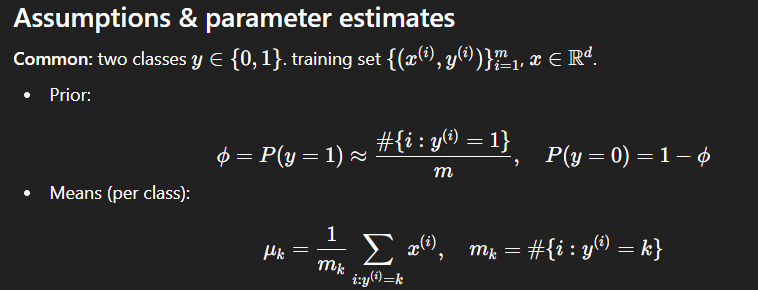

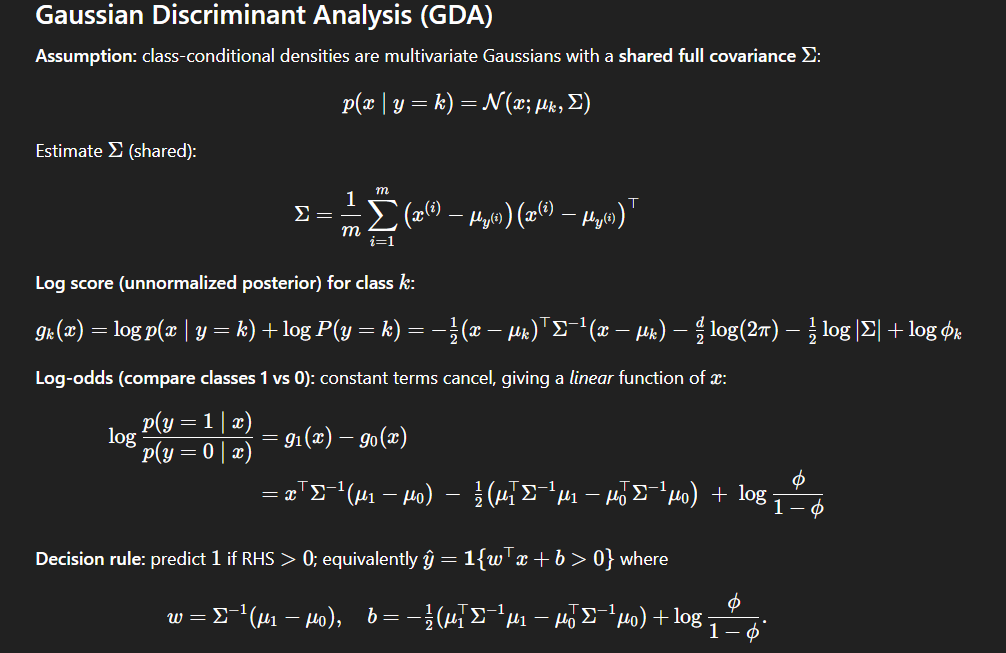

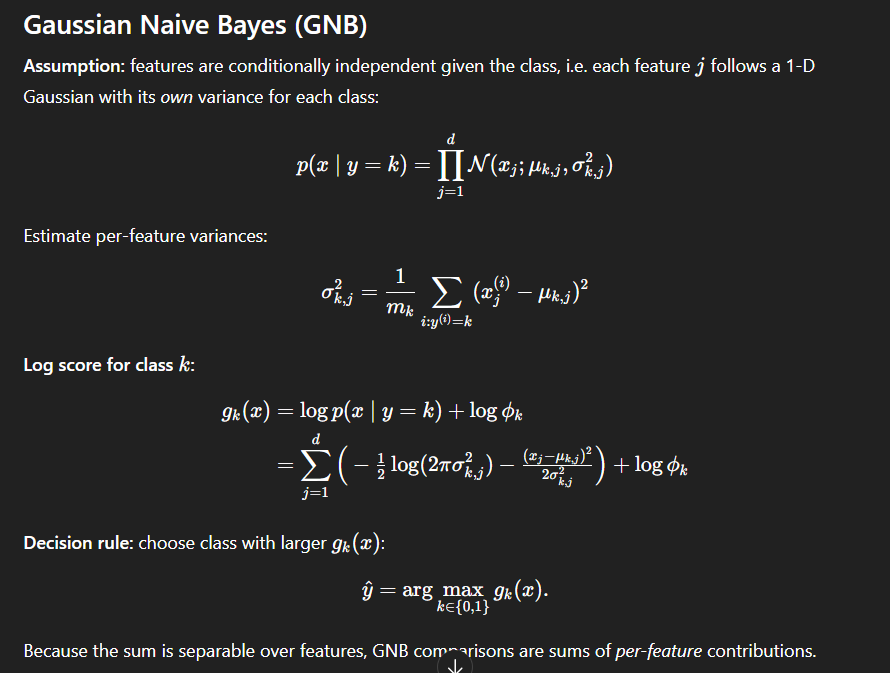

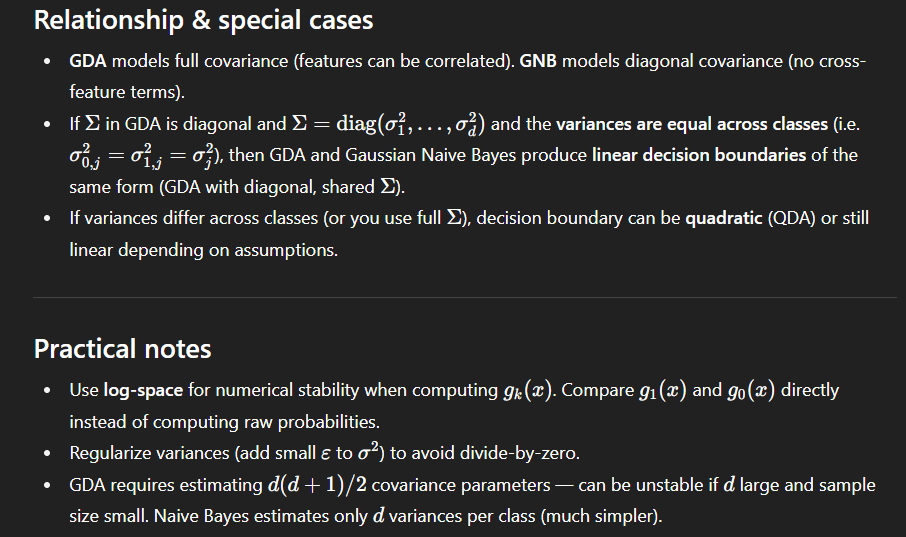

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% test, 80% train
    random_state=42, # for reproducibility
    stratify=y       # keeps class proportions same in train & test
)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(f"Gaussian Naive Bayes Accuracy: {acc * 100:.2f}%")  # equal accuracy from my model


Gaussian Naive Bayes Accuracy: 70.78%
